In [ ]:
# Implementation of MAUT Method for Multi Criteria Decision Making Problem 
# M.HosseinZarei-Spring2024

In [ ]:
# part 1 _ Read File
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
First_File = pd.read_excel('CandidateSites.xlsx')
Decision_Matrix = First_File.iloc[:, 1:].values

In [2]:
# part 2 _ Normalization 
Cost_Profit = [-1, +1, -1, -1, +1, -1, +1, -1]
n, m = Decision_Matrix.shape
Normalized_Matrix = np.zeros((n, m))

for i in range(m):
    if Cost_Profit[i] == +1:
        for j in range(n):
            normalized_column = (Decision_Matrix[j, i] - np.min(Decision_Matrix[:, i])) / (np.max(Decision_Matrix[:, i]) - np.min(Decision_Matrix[:, i]))
            Normalized_Matrix[j, i] = normalized_column
    elif Cost_Profit[i] == -1:
        for j in range(n):
            normalized_column = 1 + ((np.min(Decision_Matrix[:, i]) - Decision_Matrix[j, i]) / (np.max(Decision_Matrix[:, i]) - np.min(Decision_Matrix[:, i])))
            Normalized_Matrix[j, i] = normalized_column
# print("Normalized_Matrix:", Normalized_Matrix)

In [3]:
# part 3 _ The Marginal Utility Score
uij = np.zeros((n, m))

for i in range(n):
    for j in range(m):
        uij[i,j] = (    np.exp( np.square(Normalized_Matrix[i,j]) ) -1      )   / 1.71 

# print(uij)  

In [4]:
# Part 4 _ The Final Utility Score 
Weights = [0.113 , 0.113 , 0.125 , 0.035 , 0.299 , 0.077 , 0.129 , 0.111]
U1 =  np.zeros((n,m))
for i in range(n):
    for j in range(m):

        U1 [i,j] = uij[i,j] * Weights[j] 

U = np.sum(   ( U1  ), axis=1)     

# print(U)

In [5]:
# Part 5 _ Scores 
Final_Results = np.zeros((n, 2))

for i in range(n):
    Final_Results[i, 0] = i + 1
    Final_Results[i, 1] = U[i]

sorted_indices = np.argsort(Final_Results[:, 1]) 
Sorted_Results = Final_Results[sorted_indices[::-1]]  
print("Site        |       Score")
print("____________________________")
print(Sorted_Results)


Site        |       Score
____________________________
[[11.          0.38558123]
 [ 7.          0.34068085]
 [ 6.          0.33964227]
 [ 2.          0.31536586]
 [10.          0.30813501]
 [ 1.          0.29647557]
 [ 5.          0.27697145]
 [ 8.          0.26414525]
 [ 3.          0.25519324]
 [ 9.          0.22414299]
 [ 4.          0.0794068 ]]


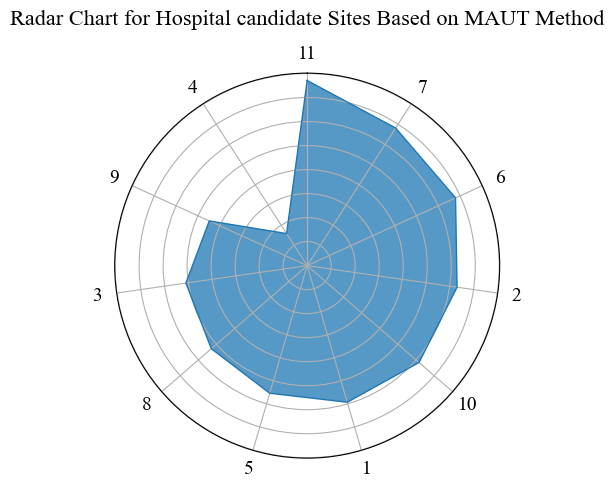

In [6]:
# Part 6 _ Radar Chart
scores = Sorted_Results[:, 1]
labels = Sorted_Results[:, 0]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
scores = np.concatenate((scores,[scores[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.plot(angles, scores, linewidth=1, linestyle='solid')
ax.fill(angles, scores, alpha=0.75)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels.astype(int), fontname='Times New Roman', fontsize=14)
ax.set_title("Radar Chart for Hospital candidate Sites Based on MAUT Method", fontname='Times New Roman',pad = 35 , fontsize=16)
plt.show()